# Extract and Analyze Twitter Data

The tweet data is retrieved using the Twitter Developer Platform and spaCy models are used for natural language processesing. Binary classification is used to score the sentiment of the tweets; 1 designated as positive, 0 as negative and a .5 threshold. 

Use this worksheet to update the query and conduct your own research!

## Install required packages as necessary
Download the spaCy English pipeline from the terminal window: python -m spacy download en_core_web_lg

In [3]:
%pip install requests
%pip install pandas
%pip install pyyaml
%pip install datetime
%pip install pandas
%pip install numpy
%pip install datetime
%pip install matplotlib 
%pip install wordcloud

%pip install seaborn
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import requests
import pandas as pd
import json
import ast
import yaml 

In [8]:
import datetime
import pandas as pd
import numpy as np
from datetime import datetime, date

## Setup Bearer Token to Use Twitter API
Save your Twitter token in a plain text file, with a .yaml exension, containing only the following: 
BEARER_TOKEN: "***"

In [9]:
#AUTHENTICATION SETUP

#function to read in YAML file containing your bearer token
def process_yaml():
    with open("/Users/tdubon/twitter/config.yaml") as file:
        return yaml.safe_load(file)
     
#access bearer token
def create_bearer_token(data):
    return data["BEARER_TOKEN"] 


#connect to Twitter API
def twitter_auth_and_connect(bearer_token, url):
    headers = {"Authorization": "Bearer{}".format(bearer_token)}
    response = requests.request("GET", url, headers=headers)
    return response.json()

## Retrieve data from Twitter
Enter keywords for query in the create_url() function. See https://tinyurl.com/2j5phrhu for instructions on customizing your query syntax

In [10]:
def create_url():
    query='(Putin OR Lukashenka OR Russia OR "Vladimir Putin") -is:retweet lang:en'
    query2='(Zelensky OR Ukraine OR Kyiv OR Kharkiv OR Chernihiv OR Mykolaiv OR Mariupol OR "Volodymyr Zelenskyy") -is:retweet lang:en'
    tweet_fields = "tweet.fields=created_at,public_metrics,context_annotations,text,possibly_sensitive,geo"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(query, tweet_fields)
    return url

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

Update path below to save to your own desktop

In [11]:
def main():
    url= create_url()
    data = process_yaml()
    bearer_token = create_bearer_token(data)
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))
    with open("/Users/tdubon/twitter/downloaded_tweets.json", "w") as json_file:
        json.dump(json_response, json_file)

In [12]:
main()

200
{
    "data": [
        {
            "context_annotations": [
                {
                    "domain": {
                        "description": "Named people in the world like Nelson Mandela",
                        "id": "10",
                        "name": "Person"
                    },
                    "entity": {
                        "description": "US President Donald Trump",
                        "id": "799022225751871488",
                        "name": "Donald Trump"
                    }
                },
                {
                    "domain": {
                        "description": "Named people in the world like Nelson Mandela",
                        "id": "10",
                        "name": "Person"
                    },
                    "entity": {
                        "description": "American actor, director and producer",
                        "id": "1070725806589001729",
                        "name": "Kevin Sorbo"
      

## Extract Data from JSON File

In [13]:
#read the JSON file back in

with open("/Users/tdubon/twitter/downloaded_tweets.json", "r") as f:
    read_content = json.load(f)

Inspect json data

In [14]:
# Inspect json data
read_content["data"]

[{'context_annotations': [{'domain': {'id': '10',
     'name': 'Person',
     'description': 'Named people in the world like Nelson Mandela'},
    'entity': {'id': '799022225751871488',
     'name': 'Donald Trump',
     'description': 'US President Donald Trump'}},
   {'domain': {'id': '10',
     'name': 'Person',
     'description': 'Named people in the world like Nelson Mandela'},
    'entity': {'id': '1070725806589001729',
     'name': 'Kevin Sorbo',
     'description': 'American actor, director and producer'}},
   {'domain': {'id': '35',
     'name': 'Politician',
     'description': 'Politicians in the world, like Joe Biden'},
    'entity': {'id': '799022225751871488',
     'name': 'Donald Trump',
     'description': 'US President Donald Trump'}},
   {'domain': {'id': '56',
     'name': 'Actor',
     'description': 'An actor or actress in the world, like Kate Winslet or Leonardo DiCaprio'},
    'entity': {'id': '1070725806589001729',
     'name': 'Kevin Sorbo',
     'description':

In [15]:
len(read_content["data"])

10

#### Define functions to retrieve each tweet field of interest

In [22]:
#Initialize Lists
id_data = []
date_data = [] 
rtwt_data = []
reply_data = []
text_data = []

#lang_data = []

In [23]:
def get_id():
    for data in read_content["data"]:
        id_record = data["id"]
        id_data.append(id_record)

def get_created_at():
    for data in read_content["data"]:
        date_record = data["created_at"]
        date_data.append(date_record)
   

def retweet_count():
    for retweets in read_content["data"]:
        rtwt_count=retweets["public_metrics"]["retweet_count"] 
        rtwt_data.append(rtwt_count)

def reply_count():
    for reply in read_content["data"]:
        reply_count = reply["public_metrics"]["reply_count"]
        reply_data.append(reply_count)

        
def get_text():
    for data in read_content["data"]:
        text_record = data["text"]
        text_data.append(text_record)
                
def get_domain():
    d_id = []
    d_name = []
    d_desc = []
    d_twt_id = []
    
    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    d_id.append(d["domain"]["id"])
                    d_name.append(d["domain"]["name"])
                    d_desc.append(d["domain"]["description"])
                    d_twt_id.append(j["id"])
                    
    domain = {"id": d_id, "name": d_name, "desc": d_desc,"tweet id": d_twt_id}
    return domain


def get_entity():    
    e_id = []
    e_name = []
    e_desc = []
    e_twt_id = []

    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    e_id.append(d["entity"]["id"])
                    e_name.append(d["entity"]["name"])
                    e_twt_id.append(j["id"])
                
    entity = {"id": e_id, "name": e_name, "desc": e_desc,"tweet id": e_twt_id}
    return entity


#def get_lang():
#    data_access = read_content["data"]
#    for data in data_access:
#        lang = data["lang"]
#        lang_data.append(lang)


In [24]:
def main():
    get_id() 
    get_created_at() 
    retweet_count()
    reply_count() 
    get_text()
    get_domain()
    get_entity()

main()


In [25]:
print(get_entity())

{'id': ['799022225751871488', '1070725806589001729', '799022225751871488', '1070725806589001729', '10037721440', '10037721440', '10028788736', '1486458201117642754', '10040395078', '864931126132985856', '10040395078', '864931126132985856', '781974597310615553', '781974597105094656', '10045313015', '799022225751871488', '799022225751871488', '864931126132985856', '864931126132985856', '1120412139691204608', '1120412139691204608', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '864931126132985856', '781974597310615553', '781974596157181956', '781974597105094656', '1065659570578612224', '864931126132985856', '864931126132985856', '781974597310615553', '781974596157181956', '781974597105094656', '10040667043'], 'name': ['Donald Trump', 'Kevin Sorbo', 'Donald Trump', 'Kevin Sorbo', 'Hillary Clinton', 'Hillary Clinton', 'The Tonight Show Starring Jimmy Fallon', 'Inflation', 'Joe Biden', 'Vladimir Putin', 'Joe Biden', 'Vladimir Pu

In [26]:
print(get_domain())

{'id': ['10', '10', '35', '56', '10', '35', '3', '67', '10', '10', '35', '35', '45', '46', '47', '10', '35', '10', '35', '10', '35', '10', '35', '10', '35', '10', '35', '45', '46', '46', '47', '10', '35', '45', '46', '46', '47'], 'name': ['Person', 'Person', 'Politician', 'Actor', 'Person', 'Politician', 'TV Shows', 'Interests and Hobbies', 'Person', 'Person', 'Politician', 'Politician', 'Brand Vertical', 'Brand Category', 'Brand', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Politician', 'Person', 'Politician', 'Brand Vertical', 'Brand Category', 'Brand Category', 'Brand', 'Person', 'Politician', 'Brand Vertical', 'Brand Category', 'Brand Category', 'Brand'], 'desc': ['Named people in the world like Nelson Mandela', 'Named people in the world like Nelson Mandela', 'Politicians in the world, like Joe Biden', 'An actor or actress in the world, like Kate Winslet or Leonardo DiCaprio', 'Named people in the world like Nelson Man

In [27]:
print(len(id_data), len(date_data), len(rtwt_data), len(reply_data), len(text_data))

10 10 10 10 10


In [28]:
#save tweet fields to dataframe (does not include entity or domain data)
save_data = {"id": id_data, "date": date_data, "retweet count": rtwt_data, "reply count": reply_data, "text": text_data}
df = pd.DataFrame(save_data)
df.columns
df.head()
df.to_csv("/Users/tdubon/twitter/pol_tweet_data.csv")

In [29]:
len(df)

10

In [30]:
print(df)

                    id                      date  retweet count  reply count  \
0  1514047514537771010  2022-04-13T01:07:11.000Z              0            0   
1  1514047513493442564  2022-04-13T01:07:11.000Z              0            0   
2  1514047512847474692  2022-04-13T01:07:11.000Z              0            0   
3  1514047512797196288  2022-04-13T01:07:11.000Z              0            0   
4  1514047508217053191  2022-04-13T01:07:10.000Z              0            0   
5  1514047507172663298  2022-04-13T01:07:10.000Z              0            0   
6  1514047505503248386  2022-04-13T01:07:09.000Z              0            0   
7  1514047505427668994  2022-04-13T01:07:09.000Z              0            0   
8  1514047503154434048  2022-04-13T01:07:09.000Z              0            0   
9  1514047502873415682  2022-04-13T01:07:08.000Z              0            0   

                                                text  
0  @4C_Blue @ksorbs Hillary’s campaign set up a R...  
1  @Fallo

## Date Formatting

In [31]:
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
df['date_frmt'] = [datetime.strptime(i, format_data) for i in df['date']]

In [32]:
df = df.drop(columns="date")

In [33]:
df.head()

,id,retweet count,reply count,text,date_frmt
0,1514047514537771010,0,0,@4C_Blue @ksorbs Hillary’s campaign set up a R...,2022-04-13 01:07:11
1,1514047513493442564,0,0,"@FallonTonight @POTUS, hey Biden, you can blam...",2022-04-13 01:07:11
2,1514047512847474692,0,0,GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling...,2022-04-13 01:07:11
3,1514047512797196288,0,0,Live on FB now! Listen to Marianne Williamson ...,2022-04-13 01:07:11
4,1514047508217053191,0,0,"@mcspocky @ResisterSis20 Any ""average"" mass mu...",2022-04-13 01:07:10


## Text Cleaning and Formatting

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import seaborn as sns
import string
import warnings
import spacy

In [39]:
#removing 
def cleanup_text(file, rem_item):
    r = re.findall(rem_item, file)
    for i in r:
        file = re.sub(i, "", file)
    return file

In [40]:
#remove handles
df["clean text"] = np.vectorize(cleanup_text)(df["text"], "@[\w]*")
df["clean text"].head()

0      Hillary’s campaign set up a Russia dossier a...
1     , hey Biden, you can blame Putin for being on...
2    GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling...
3    Live on FB now! Listen to Marianne Williamson ...
4      Any "average" mass murdering, looting and de...
Name: clean text, dtype: object

In [41]:
len(df["clean text"])
print(df["clean text"])

0      Hillary’s campaign set up a Russia dossier a...
1     , hey Biden, you can blame Putin for being on...
2    GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling...
3    Live on FB now! Listen to Marianne Williamson ...
4      Any "average" mass murdering, looting and de...
5    Flights into #Rzeszow Airport, #Poland, 11 Apr...
6    I hate #Putin especially since he invaded #Ira...
7       Putin also paid for Ukraine to overthrow th...
8    Canada’s friends Mexico and India are still mo...
9     Russia criminalizes using the word 'war' to d...
Name: clean text, dtype: object


### Tokenize text in spaCy

In [44]:
#convert to tokens
nlp = spacy.load("en_core_web_lg")
#to load previously trained model saved to your PC:
#nlp = spacy.load("/Users/tdubon/spaCy_models")

text = str(df["clean text"])
doc = nlp(text)

In [45]:
tokens_list = [] 
for token in doc:
    tokens_list.append(token)

tokens_list

[0,
      ,
 Hillary,
 ’s,
 campaign,
 set,
 up,
 a,
 Russia,
 dossier,
 a,
 ...,
 ,
 1,
     ,
 ,,
 hey,
 Biden,
 ,,
 you,
 can,
 blame,
 Putin,
 for,
 being,
 on,
 ...,
 ,
 2,
    ,
 GO,
 JOE!\n,
 👏,
 🇺,
 🇸,
 👏,
 \n\nTrump,
 would,
 have,
 been,
 calling,
 ...,
 ,
 3,
    ,
 Live,
 on,
 FB,
 now,
 !,
 Listen,
 to,
 Marianne,
 Williamson,
 ...,
 ,
 4,
      ,
 Any,
 ",
 average,
 ",
 mass,
 murdering,
 ,,
 looting,
 and,
 de,
 ...,
 ,
 5,
    ,
 Flights,
 into,
 #,
 Rzeszow,
 Airport,
 ,,
 #,
 Poland,
 ,,
 11,
 Apr,
 ...,
 ,
 6,
    ,
 I,
 hate,
 #,
 Putin,
 especially,
 since,
 he,
 invaded,
 #,
 Ira,
 ...,
 ,
 7,
       ,
 Putin,
 also,
 paid,
 for,
 Ukraine,
 to,
 overthrow,
 th,
 ...,
 ,
 8,
    ,
 Canada,
 ’s,
 friends,
 Mexico,
 and,
 India,
 are,
 still,
 mo,
 ...,
 ,
 9,
     ,
 Russia,
 criminalizes,
 using,
 the,
 word,
 ',
 war,
 ',
 to,
 d,
 ...,
 ,
 Name,
 :,
 clean,
 text,
 ,,
 dtype,
 :,
 object]

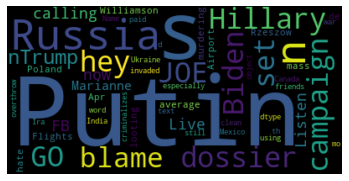

In [46]:
#wordcloud
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(str(tokens_list))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Prepare text for analysis

In [47]:
#Review entities recognized
for ent in doc.ents:
    print(ent.text, ent.label_)

0 CARDINAL
Russia GPE
1 CARDINAL
Biden PERSON
Putin PERSON
2 CARDINAL
3 CARDINAL
Marianne Williamson PERSON
4 CARDINAL
5 CARDINAL
#Rzeszow Airport QUANTITY
Poland GPE
11 Apr... DATE
6 CARDINAL
7 CARDINAL
Putin PERSON
Ukraine GPE
8 CARDINAL
Canada GPE
Mexico GPE
India GPE
9 CARDINAL
Russia GPE


In [48]:
#Add a category for entities of interest, if needed. 
from spacy.matcher import PhraseMatcher 
matcher = PhraseMatcher(nlp.vocab) 

#define politicians as entities 
terms = ["Putin", "Zelensky"] 
patterns = [nlp.make_doc(term) for term in terms] 
matcher.add("politiciansList", None, *patterns) 

matches = matcher(doc) 

#this prints out the spans where the instances are found and the entity identified
for mid, start, end in matches: 
    print(start, end, doc[start:end])


22 23 Putin
90 91 Putin
101 102 Putin


## Text Classification

In [49]:
import random
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

In [50]:
#set the threshold value in config

config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL }

textcat = nlp.add_pipe("textcat", config=config) 

In [51]:
#create training data for your example consisting of examples of positive and negative sentiment
train_data = [("Helping refugees. This is what kindness looks like.", {"cats": {"POS": True}}),
              ("In this time of uncertainty, we have a clear way forward: Help Ukraine defend itself. Support the Ukrainian people. Hold Russia accountable.", {"cats": {"POS": True}}),
              ("Priests demand head of Ukrainian Orthodox Church Moscow Patriarchate be brought to church tribunal for position on war.", {"cats": {"POS": True}}),
              ("Mayor of the most northern village in Ukraine Hremiach Hanna Havrylina was released after yesterday’s prisoners’ swap.", {"cats": {"POS": True}}),
              ("Look at this female volunteer from Belarus fighting alongside Ukrainians.", {"cats": {"POS": True}}),
              ("Russian soldiers: They're animals... Humans don't behave like this. My parents told me about WW2 & the fascists didn't even do such things.", {"cats": {"NEG": True}}),
              ("All Russians are evil", {"cats": {"NEG": True}}),
              ("The West is pushing Ukraine toward a conflict.", {"cats": {"NEG": True}}),
              ("Cowards", {"cats": {"NEG": True}}),
              ("Russia’s deployment of combat forces is a mere repositioning of troops on its own territory.", {"cats": {"NEG": True}}),
              ("Ukraine and Ukrainian government officials are the aggressor in the Russia-Ukraine relationship.", {"cats": {"NEG": True}})] 

In [52]:
textcat.add_label("POS")
textcat.add_label("NEG")
    
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data] 

In [53]:
textcat.initialize(lambda: train_examples, nlp=nlp)

In [54]:
#Define training example

epochs = 20

#Disable other pipe components & define training loop to incorporate statistical information

with nlp.select_pipes(enable="textcat"):
    optimizer = nlp.resume_training() #Creates optimizer object
    for i in range(epochs):
        random.shuffle(train_data)
        for text, label in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, label) 
            print(nlp.update([example], sgd=optimizer))
            

{'textcat': 0.25}
{'textcat': 0.24709004163742065}
{'textcat': 0.2585429549217224}
{'textcat': 0.26014813780784607}
{'textcat': 0.25638172030448914}
{'textcat': 0.2522927522659302}
{'textcat': 0.2738782465457916}
{'textcat': 0.26701119542121887}
{'textcat': 0.2605363428592682}
{'textcat': 0.257417231798172}
{'textcat': 0.26026448607444763}
{'textcat': 0.23580822348594666}
{'textcat': 0.23120661079883575}
{'textcat': 0.22243280708789825}
{'textcat': 0.24094270169734955}
{'textcat': 0.242473304271698}
{'textcat': 0.1726875901222229}
{'textcat': 0.21651531755924225}
{'textcat': 0.21511781215667725}
{'textcat': 0.26611948013305664}
{'textcat': 0.23996813595294952}
{'textcat': 0.2505776584148407}
{'textcat': 0.1755438894033432}
{'textcat': 0.23816289007663727}
{'textcat': 0.14580346643924713}
{'textcat': 0.23726409673690796}
{'textcat': 0.17826901376247406}
{'textcat': 0.15487225353717804}
{'textcat': 0.19118596613407135}
{'textcat': 0.21265970170497894}
{'textcat': 0.20300321280956268}
{'t

In [55]:
#enter an example tweet to test results
doc2 = nlp("As Russia continues to commit horrific atrocities against the Ukrainian people, we must take additional steps to cut off")

print(doc2.cats)

{'POS': 0.7345556616783142, 'NEG': 0.26544439792633057}


In [56]:
#enter another example
doc3 = nlp("One of the captured Russian soldiers who was sent by Putin to “denazify” Ukraine")
print(doc3.cats)

{'POS': 0.41941937804222107, 'NEG': 0.5805805921554565}


In [57]:
#process each row in clean text column
df["nlp_proc"] = [nlp(i) for i in df["clean text"]]

In [58]:
#save positive/negative predictioins to cats column
df["cats"] = [i.cats for i in df["nlp_proc"]]

In [59]:
df

,id,retweet count,reply count,text,date_frmt,clean text,nlp_proc,cats
0,1514047514537771010,0,0,@4C_Blue @ksorbs Hillary’s campaign set up a R...,2022-04-13 01:07:11,Hillary’s campaign set up a Russia dossier a...,"( , Hillary, ’s, campaign, set, up, a, Russia...","{'POS': 0.18171824514865875, 'NEG': 0.81828176..."
1,1514047513493442564,0,0,"@FallonTonight @POTUS, hey Biden, you can blam...",2022-04-13 01:07:11,", hey Biden, you can blame Putin for being on...","( , ,, hey, Biden, ,, you, can, blame, Putin, ...","{'POS': 0.26307618618011475, 'NEG': 0.73692381..."
2,1514047512847474692,0,0,GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling...,2022-04-13 01:07:11,GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling...,"(GO, JOE, !, \n, 👏, 🇺, 🇸, 👏, \n\n, Trump, woul...","{'POS': 0.5458758473396301, 'NEG': 0.454124152..."
3,1514047512797196288,0,0,Live on FB now! Listen to Marianne Williamson ...,2022-04-13 01:07:11,Live on FB now! Listen to Marianne Williamson ...,"(Live, on, FB, now, !, Listen, to, Marianne, W...","{'POS': 0.2864307463169098, 'NEG': 0.713569223..."
4,1514047508217053191,0,0,"@mcspocky @ResisterSis20 Any ""average"" mass mu...",2022-04-13 01:07:10,"Any ""average"" mass murdering, looting and de...","( , Any, "", average, "", mass, murdering, ,, l...","{'POS': 0.46320807933807373, 'NEG': 0.53679198..."
5,1514047507172663298,0,0,"Flights into #Rzeszow Airport, #Poland, 11 Apr...",2022-04-13 01:07:10,"Flights into #Rzeszow Airport, #Poland, 11 Apr...","(Flights, into, #, Rzeszow, Airport, ,, #, Pol...","{'POS': 0.9226107001304626, 'NEG': 0.077389262..."
6,1514047505503248386,0,0,I hate #Putin especially since he invaded #Ira...,2022-04-13 01:07:09,I hate #Putin especially since he invaded #Ira...,"(I, hate, #, Putin, especially, since, he, inv...","{'POS': 0.1128261461853981, 'NEG': 0.887173891..."
7,1514047505427668994,0,0,@autodafe20 @BlackEx74328444 @TheAfrican_Hub P...,2022-04-13 01:07:09,Putin also paid for Ukraine to overthrow th...,"( , Putin, also, paid, for, Ukraine, to, ove...","{'POS': 0.14540664851665497, 'NEG': 0.85459333..."
8,1514047503154434048,0,0,Canada’s friends Mexico and India are still mo...,2022-04-13 01:07:09,Canada’s friends Mexico and India are still mo...,"(Canada, ’s, friends, Mexico, and, India, are,...","{'POS': 0.17388196289539337, 'NEG': 0.82611811..."
9,1514047502873415682,0,0,@pmarca Russia criminalizes using the word 'wa...,2022-04-13 01:07:08,Russia criminalizes using the word 'war' to d...,"( , Russia, criminalizes, using, the, word, ',...","{'POS': 0.7491072416305542, 'NEG': 0.250892698..."


In [60]:
#assign value of 1 to positive classification, 0 to negative
sc_val = []

for i in df["cats"]:
    if i["POS"] >= .5:
        sc_val.append(1)
    else:
        sc_val.append(0)
        

In [61]:
#append classification score to dataframe
df["score"] = sc_val
print(df.head())

                    id  retweet count  reply count  \
0  1514047514537771010              0            0   
1  1514047513493442564              0            0   
2  1514047512847474692              0            0   
3  1514047512797196288              0            0   
4  1514047508217053191              0            0   

                                                text           date_frmt  \
0  @4C_Blue @ksorbs Hillary’s campaign set up a R... 2022-04-13 01:07:11   
1  @FallonTonight @POTUS, hey Biden, you can blam... 2022-04-13 01:07:11   
2  GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling... 2022-04-13 01:07:11   
3  Live on FB now! Listen to Marianne Williamson ... 2022-04-13 01:07:11   
4  @mcspocky @ResisterSis20 Any "average" mass mu... 2022-04-13 01:07:10   

                                          clean text  \
0    Hillary’s campaign set up a Russia dossier a...   
1   , hey Biden, you can blame Putin for being on...   
2  GO JOE!\n👏🇺🇸👏\n\nTrump would have been calling.

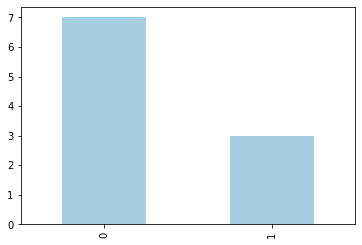

In [62]:
#plot
ax = df.score.value_counts().plot(kind="bar", colormap="Paired")
plt.show()

In [63]:
#print out tweet id, text and score = to review results
for index, i in enumerate(df["score"]):
    if i == 1:
        print(df["id"][index], df["clean text"][index], df["score"][index])

1514047512847474692 GO JOE!
👏🇺🇸👏

Trump would have been calling the Putin-Russian Soldiers-Genocide fake news. 

JOE WAS THE FIRST TO SLAM PUTIN!
👏🇺🇸👏 https://t.co/ntstpn4HKg 1
1514047507172663298 Flights into #Rzeszow Airport, #Poland, 11 April 2022.

Big thanks to  at  for this chart:

#Ukraine #Russia https://t.co/CuoXjCtkfb 1
1514047502873415682  Russia criminalizes using the word 'war' to describe its war against Ukraine to keep its population compliant through ignorance.

Twitter, a private entity, blocks accounts spreading disinformation.

The outcome: Russians are being kept in the dark about:
https://t.co/BU2UJC9Xbh 1


In [64]:
#Saving custom model - define where you would like your model to be saved. 

from pathlib import Path
output_dir=Path("/Users/tdubon/spaCy_models")

def save_model(output_dir):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)
        
save_model(output_dir)

Saved model to /Users/tdubon/spaCy_models


In [305]:
### To load trained custom model to run on new data use:
#nlp = spacy.load("/Users/tdubon/spaCy_models")